In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc("figure", figsize=(10, 10))
mpl.rcParams.update({'font.size': 10})
import matplotlib.pyplot as plt

base_path = '/data/notebooks/jupyterlab-biascorrlab/data/Lima2021/'
folders = ['Randomly_Distributed_Observations_100','Land_Only_Distributed_Observations_100']

In [2]:
df = pd.read_csv(f'{base_path}{folders[0]}/AP_BiasAdjusted_Snowfall_044.csv', index_col=0) 

In [3]:
site_coords = df[['grid_latitude','grid_longitude']].drop_duplicates()

In [4]:
i=200
df_test_site = df[(df['grid_latitude'] == site_coords['grid_latitude'][i]) & (df['grid_longitude'] == site_coords['grid_longitude'][i])]

<AxesSubplot:xlabel='index'>

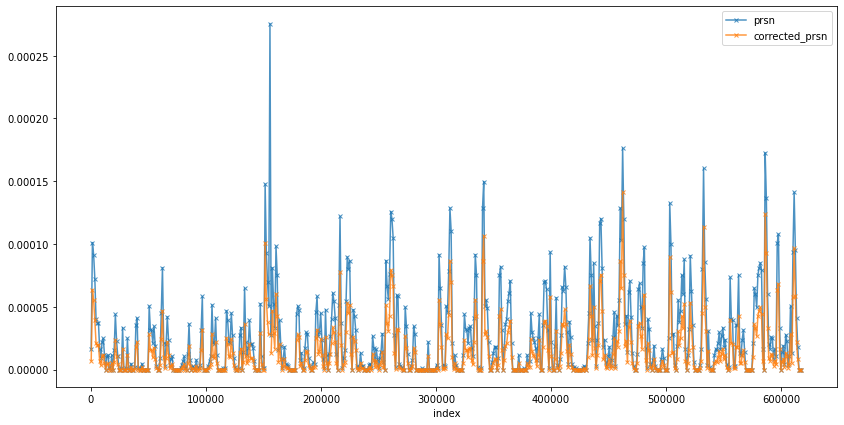

In [5]:
df_test_site.sort_values(by=['time']).reset_index().plot(x='index',y=['prsn','corrected_prsn'],figsize=(14,7),alpha=0.8,marker='x',markersize=4)

Text(0, 0.5, 'Cumulative Probability')

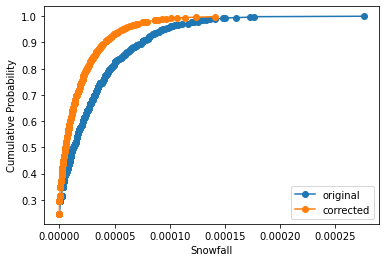

In [6]:
fig = plt.figure()
ax= plt.gca()
df_test_site.sort_values(by=['adjusted_ecdf']).plot(x='prsn',y='adjusted_ecdf',marker='o',ax=ax,label='original')
df_test_site.sort_values(by=['adjusted_ecdf']).plot(x='corrected_prsn',y='adjusted_ecdf',marker='o',ax=ax,label='corrected')
plt.xlabel('Snowfall')
plt.ylabel('Cumulative Probability')